<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
dir(warnings)

['WarningMessage',
 '_OptionError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_add_filter',
 '_defaultaction',
 '_filters_mutated',
 '_formatwarning_orig',
 '_formatwarnmsg',
 '_formatwarnmsg_impl',
 '_getaction',
 '_getcategory',
 '_is_internal_frame',
 '_next_external_frame',
 '_onceregistry',
 '_processoptions',
 '_setoption',
 '_showwarning_orig',
 '_showwarnmsg',
 '_showwarnmsg_impl',
 '_warn_unawaited_coroutine',
 'catch_warnings',
 'defaultaction',
 'filters',
 'filterwarnings',
 'formatwarning',
 'onceregistry',
 'resetwarnings',
 'showwarning',
 'simplefilter',
 'sys',
 'warn',
 'warn_explicit']

In [ ]:
#!pip install scipy

In [4]:
import scipy.stats as stats

In [2]:
plt.rcParams['figure.figsize'] = (10,8)

In [3]:
df = pd.read_csv('data/penguins.csv')

In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [14]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [23]:
df.mean()

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

In [24]:
df.bill_length_mm.mean()

43.9927927927928

In [25]:
df.median()

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

In [26]:
df.bill_length_mm.max()

59.6

In [27]:
df.bill_length_mm.min()

32.1

<AxesSubplot:>

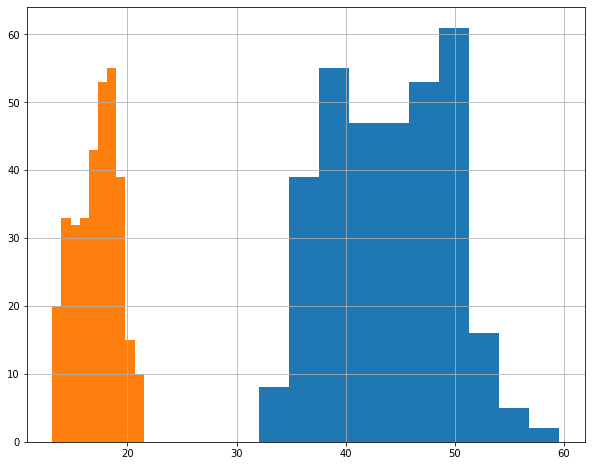

In [30]:
df.bill_length_mm.hist()
df.bill_depth_mm.hist()

In [32]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


<AxesSubplot:>

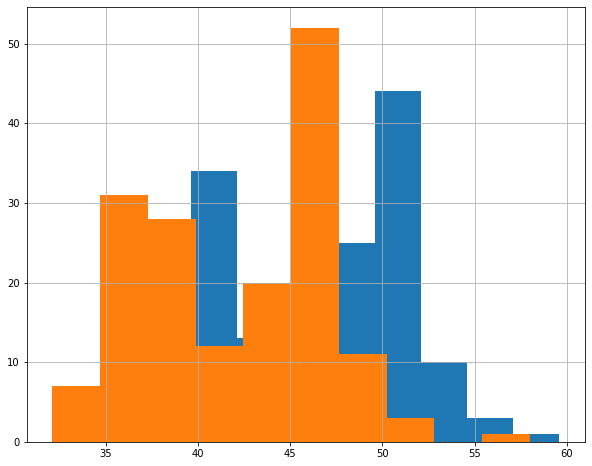

In [34]:
df[df.sex=='male'].bill_length_mm.hist()
df[df.sex=='female'].bill_length_mm.hist()

<AxesSubplot:title={'center':'bill_length_mm'}, xlabel='sex'>

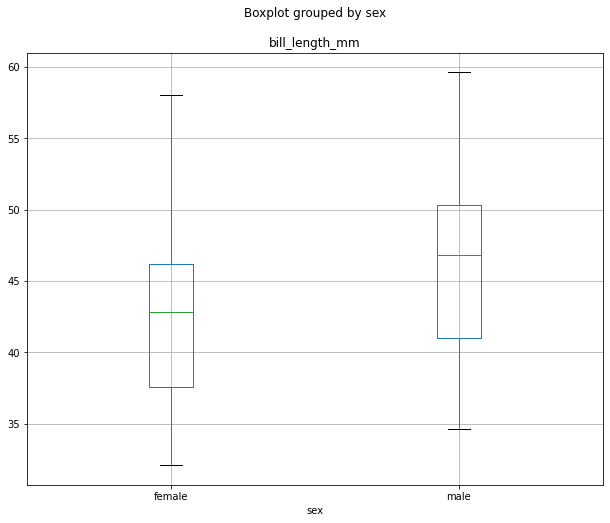

In [37]:
df.boxplot('bill_length_mm', by='sex')

<AxesSubplot:title={'center':'bill_length_mm'}, xlabel='species'>

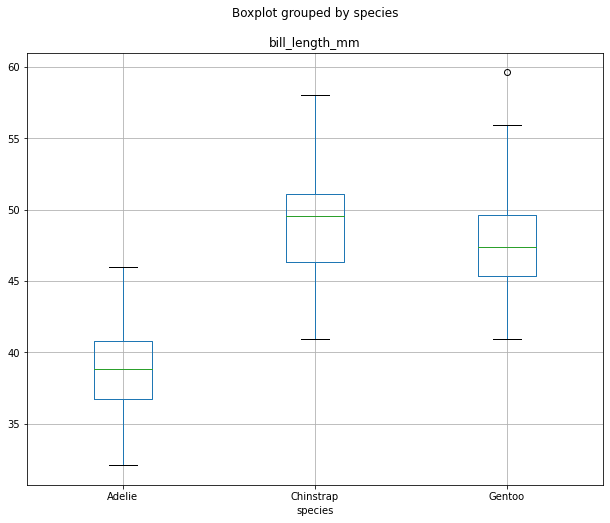

In [39]:
df.boxplot('bill_length_mm', by='species')

<AxesSubplot:xlabel='species'>

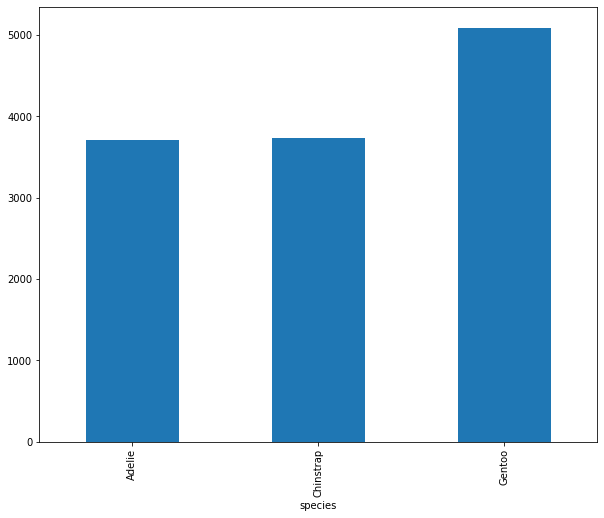

In [43]:
df.groupby('species').mean()['body_mass_g'].plot(kind='bar')

<AxesSubplot:title={'center':'body_mass_g'}, xlabel='species'>

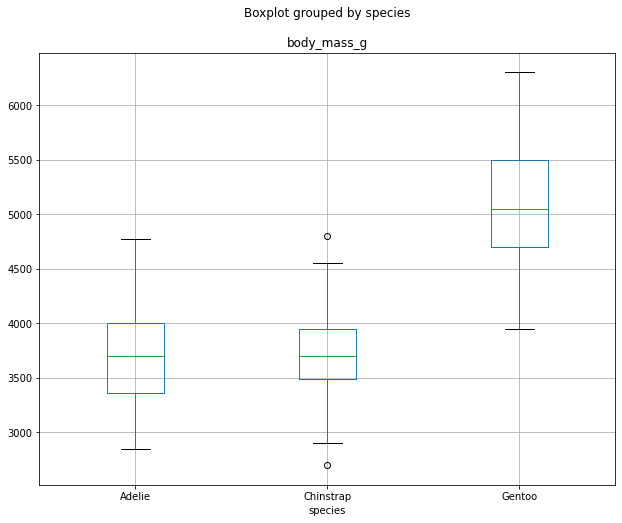

In [44]:
df.boxplot('body_mass_g', by='species')

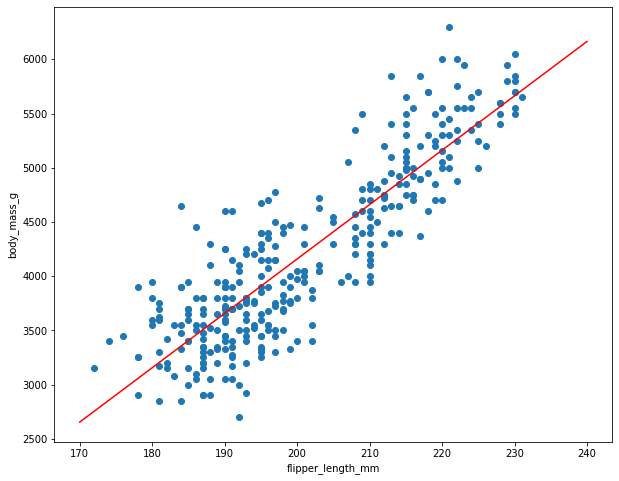

In [108]:
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.gca().set_xlabel('flipper_length_mm')
plt.gca().set_ylabel('body_mass_g')

slope, intercept, r, p, s = stats.linregress(df.flipper_length_mm, 
                                                               df.body_mass_g)
y1 = intercept + slope*170
y2 = intercept + slope*240
plt.plot((170,240),(y1,y2), color='r')

In [52]:
import seaborn as sns

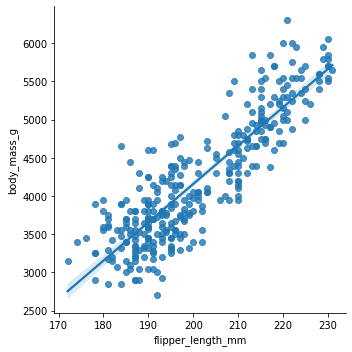

In [57]:
sns.lmplot(data=df, 
            x='flipper_length_mm', 
            y='body_mass_g')

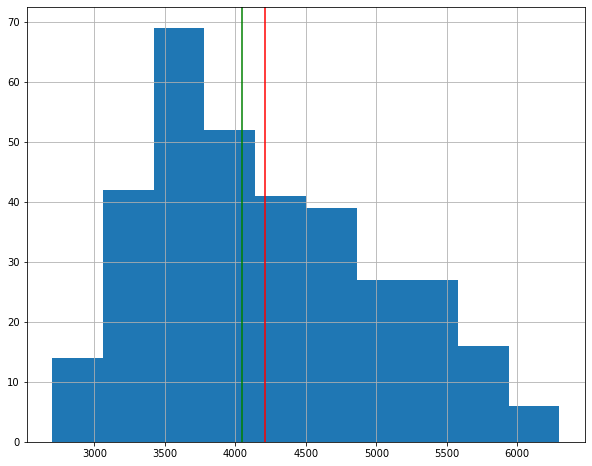

In [63]:
df['body_mass_g'].hist()
plt.axvline(df['body_mass_g'].mean(), color='r')
plt.axvline(df['body_mass_g'].median(), color='g')

In [59]:
df['body_mass_g'].mean()

4207.057057057057

<AxesSubplot:xlabel='island', ylabel='count'>

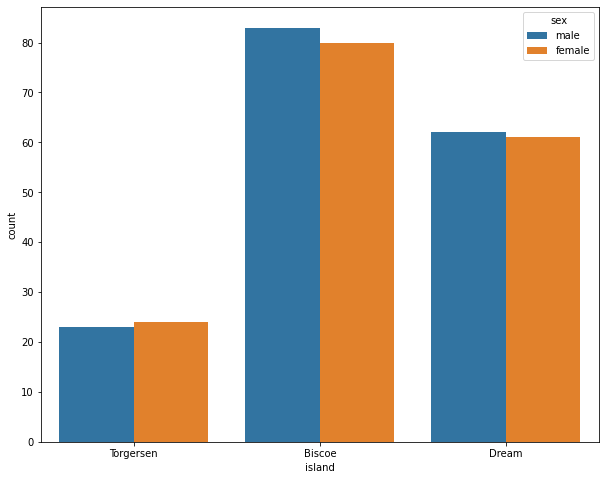

In [69]:
sns.countplot(data=df, x='island', hue='sex')

In [76]:
pd.crosstab(df['species'],df['sex'])

sex,female,male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


<AxesSubplot:xlabel='sex', ylabel='species'>

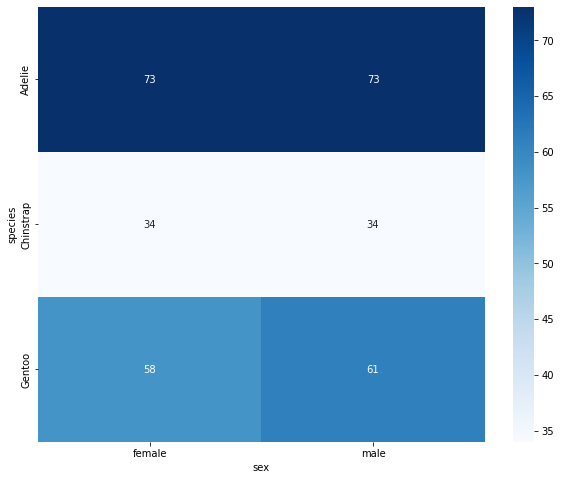

In [80]:
sns.heatmap(pd.crosstab(df['species'],df['sex']), 
            annot=True, cmap='Blues')

<AxesSubplot:xlabel='sex'>

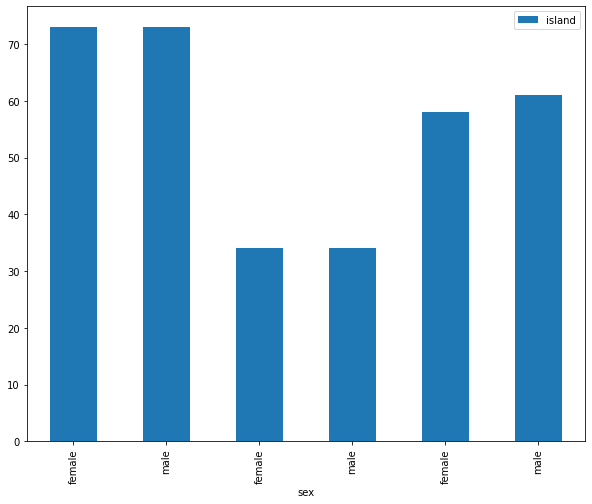

In [89]:
df.groupby(['species','sex']).count()['island'].reset_index().set_index('sex').plot(kind='bar', stacked=True)

In [94]:
df[['species','sex']].pivot_table(index='species', columns='sex')

KeyError: 'count'

<AxesSubplot:title={'center':'Stacked Bar Chart Pandas Dataframe'}, xlabel='species'>

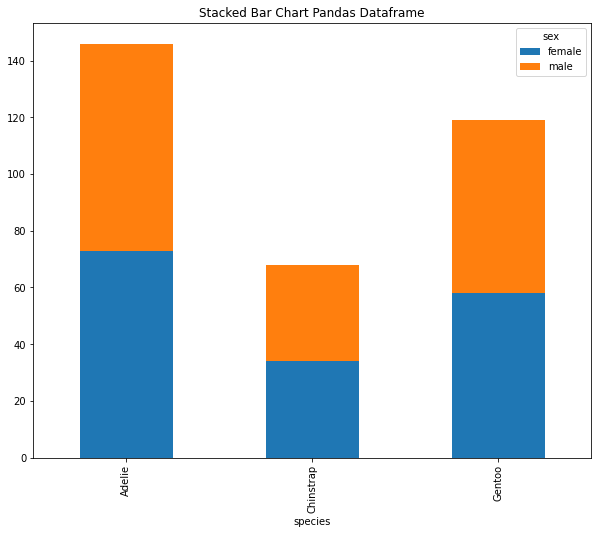

In [99]:
pd.crosstab(df['species'],df['sex']).reset_index().plot(x='species', kind='bar', stacked=True,
        title='Stacked Bar Chart Pandas Dataframe', 
        figsize=(10,8))

In [ ]:
df.plot(x='Team', kind='bar', stacked=True,
        title='Stacked Bar Chart Pandas Dataframe', 
        figsize=(12,6))